http://static-maps.yandex.ru/1.x/?&size=650,450&l=map&pl=w:6,bw:3,-93.50,22.50,-93.80,22.70,-94.60,23.10,-95.40,23.50,-96.30,23.90,-97.00,24.10,-97.70,24.50,-98.60,24.90,-99.83,25.20


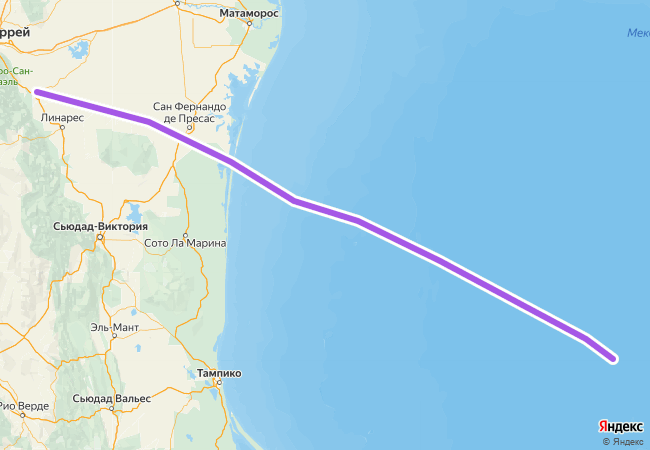

In [9]:
import requests, sys, os, numpy
from IPython.display import Image, display


# Создайте оконное приложение, отображающее карту по координатам и в масштабе, который задаётся программно.
class MapParams(object):
    def __init__(self, data: numpy.array):
        self.dots = data

        # Координаты центра
        self.lat: float = numpy.nan   # Широта
        self.lon: float = numpy.nan  # Долгота

        self.zoom: int = 3  # Масштаб карты на старте. Изменяется от 1 до 17
        self.type: str = "map"  # Другие значения "sat", "sat,skl"

        # Разрешение изображения (максимум 650x450)
        self.width: int = 650
        self.height: int = 450

    # Преобразование координат в параметр ll, требуется без пробелов, через запятую и без скобок
    def ll_key(self):
        return f'{self.lon:.6f},{self.lat:.6f}'

    # Размеры выходного изображения
    def size_key(self):
        return str(self.width) + "," + str(self.height)

    # Находим центр изображения
    def find_center(self) -> list:
        res = list(numpy.mean(self.dots, axis=0))
        self.lon, self.lat = res
        return res

    def find_borders(self):
        pass

    def line_key(self):
        result = ''
        for i in self.dots:
            result += f'{i[1]:.2f},{i[0]:.2f},'
        return result[:-1]


# Создание карты с соответствующими параметрами.
def load_map(mp):
    #ll - центр (автомат)
    #z(zoom) - масштабирование (автомат)
    #size - разрешение изображения
    #bbox - границы отображения
    map_request = "http://static-maps.yandex.ru/1.x/?&size={sz}&l={type}&pl=w:6,bw:3,{coords}". \
        format(type=mp.type, sz=mp.size_key(), coords=mp.line_key())

    response = requests.get(map_request)
    if not response:
        print("Ошибка выполнения запроса:")
        print(map_request)
        print("Http статус:", response.status_code, "(", response.reason, ")")
        sys.exit(1)

    # Запись полученного изображения в файл.
    map_file = "map.png"
    try:
        with open(map_file, "wb") as file:
            file.write(response.content)
    except IOError as ex:
        print("Ошибка записи временного файла:", ex)
        sys.exit(2)
    return map_file


def main():
    data = numpy.array([22.5,-93.5,22.7,-93.8,23.1,-94.6,23.5,-95.4,23.9,-96.3,24.1,
                        -97.0,24.5,-97.7,24.9,-98.6,25.2,-99.8]).reshape(-1, 2)
    mp = MapParams(data)
    mp.find_center()
    load_map(mp)
    display(Image(filename='map.png'))


if __name__ == "__main__":
    main()